# Biomarkers for palbociclib - Workbook 2 June 2023 

## Import Data

In [1]:
import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import CCLE gene expression data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)


# import proteomic expression
with open('data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_fillna_processed.pkl', 'rb') as f:
    joined_full_protein_matrix = pickle.load(f)
    joined_sin_peptile_exclusion_matrix = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# open STRING to goncalves mapping file

with open('data\protein-interaction\STRING\goncalve_to_string_id_df.pkl', 'rb') as f:
    goncalve_to_string_id_df = pickle.load(f)


## Palbociclib GDSC with Goncalves et al proteomics (preprocessed & normalised)

In [2]:
# create feature and target 

import DataFunctions as utils

drug_selected = 'Palbociclib'

# create the full dataset

palbociclib_proteomic_df = utils.create_joint_dataset_from_proteome_gdsc(drug_selected, joined_sin_peptile_exclusion_matrix, gdsc2)

feature_data, label_data = utils.create_feature_and_label(palbociclib_proteomic_df)



### Computing Interactors

In [3]:
# using STRING database to select the 1st,2nd and 3rd degree neighbours of the drug target

import pandas as pd

drug_targets = ['CDK4', 'CDK6']
first_degree_neighbours = []
second_degree_neighbours = []
third_degree_neighbours = []

for drug_target in drug_targets:
    string_id = utils.get_protein_id_by_name(drug_target, string_df_info, string_df_alias)
    if string_id is not None:
        first_interactors_string_id = utils.get_protein_interactors(string_id, string_df, score_threshold=900)
        for ii in first_interactors_string_id:
            interactor_name = utils.get_protein_name_by_id(ii, goncalve_to_string_id_df, 
                                                           field_name='goncalve_protein_id',
                                                           check_field_name='string_protein_id')
            if interactor_name is not None:
                first_degree_neighbours.append(interactor_name)

first_degree_neighbours = list(set(first_degree_neighbours))

print(f'first degree neighbours size: {len(first_degree_neighbours)}')
print(f'first degree neighbours: {first_degree_neighbours}')

first degree neighbours size: 43
first degree neighbours: ['P49841;GSK3B_HUMAN', 'P12004;PCNA_HUMAN', 'P20248;CCNA2_HUMAN', 'P42771;CDN2A_HUMAN', 'P49918;CDN1C_HUMAN', 'P50613;CDK7_HUMAN', 'P15090;FABP4_HUMAN', 'P07948;LYN_HUMAN', 'Q00534;CDK6_HUMAN', 'Q14186;TFDP1_HUMAN', 'P50750;CDK9_HUMAN', 'O75832;PSD10_HUMAN', 'P16989;YBOX3_HUMAN', 'P06493;CDK1_HUMAN', 'Q13547;HDAC1_HUMAN', 'Q13485;SMAD4_HUMAN', 'Q9P287;BCCIP_HUMAN', 'Q00535;CDK5_HUMAN', 'P42773;CDN2C_HUMAN', 'P31947;1433S_HUMAN', 'P06400;RB_HUMAN', 'Q9P2W1;HOP2_HUMAN', 'P51948;MAT1_HUMAN', 'P49715;CEBPA_HUMAN', 'P12931;SRC_HUMAN', 'O43502;RA51C_HUMAN', 'P24941;CDK2_HUMAN', 'P08238;HS90B_HUMAN', 'P51946;CCNH_HUMAN', 'Q16543;CDC37_HUMAN', 'P04637;P53_HUMAN', 'O60563;CCNT1_HUMAN', 'P07900;HS90A_HUMAN', 'O95067;CCNB2_HUMAN', 'P11802;CDK4_HUMAN', 'P84022;SMAD3_HUMAN', 'P14635;CCNB1_HUMAN', 'Q13951;PEBB_HUMAN', 'P24385;CCND1_HUMAN', 'Q9BWT6;MND1_HUMAN', 'P00519;ABL1_HUMAN', 'Q13309;SKP2_HUMAN', 'P10275;ANDR_HUMAN']


In [4]:
# get the second degree neighbours using first_interactors_string_id

for ii in first_interactors_string_id:
    second_interactors_string_id = utils.get_protein_interactors(ii, string_df, score_threshold=900)
    for sec_ii in second_interactors_string_id:
        interactor_name = utils.get_protein_name_by_id(sec_ii, goncalve_to_string_id_df, 
                                                       field_name='goncalve_protein_id',
                                                       check_field_name='string_protein_id')
        if interactor_name is not None:
            second_degree_neighbours.append(interactor_name)

second_degree_neighbours = list(set(second_degree_neighbours + first_degree_neighbours))
print(f'second degree neighbours size: {len(second_degree_neighbours)}')
print(f'second degree neighbours: {second_degree_neighbours}')



second degree neighbours size: 967
second degree neighbours: ['P62714;PP2AB_HUMAN', 'Q8IXJ6;SIR2_HUMAN', 'P13591;NCAM1_HUMAN', 'P35052;GPC1_HUMAN', 'Q96DE5;APC16_HUMAN', 'P55735;SEC13_HUMAN', 'Q75N03;HAKAI_HUMAN', 'P50990;TCPQ_HUMAN', 'Q9UJX3;APC7_HUMAN', 'P23921;RIR1_HUMAN', 'Q13330;MTA1_HUMAN', 'P05106;ITB3_HUMAN', 'P61978;HNRPK_HUMAN', 'P63244;RACK1_HUMAN', 'Q07021;C1QBP_HUMAN', 'Q6RW13;ATRAP_HUMAN', 'P45973;CBX5_HUMAN', 'P22694;KAPCB_HUMAN', 'P01019;ANGT_HUMAN', 'Q00688;FKBP3_HUMAN', 'Q9NYZ3;GTSE1_HUMAN', 'P61981;1433G_HUMAN', 'P29083;T2EA_HUMAN', 'Q9H9Z2;LN28A_HUMAN', 'Q96B01;R51A1_HUMAN', 'P27540;ARNT_HUMAN', 'Q9Y294;ASF1A_HUMAN', 'Q96KB5;TOPK_HUMAN', 'Q9UIW2;PLXA1_HUMAN', 'O60763;USO1_HUMAN', 'P30086;PEBP1_HUMAN', 'P55036;PSMD4_HUMAN', 'P20273;CD22_HUMAN', 'P40227;TCPZ_HUMAN', 'P49720;PSB3_HUMAN', 'Q99661;KIF2C_HUMAN', 'Q8N1F7;NUP93_HUMAN', 'P49715;CEBPA_HUMAN', 'P05067;A4_HUMAN', 'Q99496;RING2_HUMAN', 'Q9Y2X9;ZN281_HUMAN', 'P42695;CNDD3_HUMAN', 'P19320;VCAM1_HUMAN', 'Q9UJQ4;SAL

In [5]:
# get the third degree neighbours using second_interactors_string_id

for ii in second_interactors_string_id:
    third_interactors_string_id = utils.get_protein_interactors(ii, string_df, score_threshold=900)
    for third_ii in third_interactors_string_id:
        interactor_name = utils.get_protein_name_by_id(third_ii, goncalve_to_string_id_df, 
                                                       field_name='goncalve_protein_id',
                                                       check_field_name='string_protein_id')
        if interactor_name is not None:
            third_degree_neighbours.append(interactor_name)

third_degree_neighbours = list(set(third_degree_neighbours + second_degree_neighbours))
print(f'third degree neighbours size: {len(third_degree_neighbours)}')
print(f'third degree neighbours: {third_degree_neighbours}')

third degree neighbours size: 993
third degree neighbours: ['P62714;PP2AB_HUMAN', 'Q8IXJ6;SIR2_HUMAN', 'P13591;NCAM1_HUMAN', 'P35052;GPC1_HUMAN', 'Q96DE5;APC16_HUMAN', 'P55735;SEC13_HUMAN', 'Q75N03;HAKAI_HUMAN', 'P50990;TCPQ_HUMAN', 'Q9UJX3;APC7_HUMAN', 'P23921;RIR1_HUMAN', 'Q13330;MTA1_HUMAN', 'P05106;ITB3_HUMAN', 'P61978;HNRPK_HUMAN', 'P63244;RACK1_HUMAN', 'Q07021;C1QBP_HUMAN', 'Q00688;FKBP3_HUMAN', 'Q6RW13;ATRAP_HUMAN', 'P22694;KAPCB_HUMAN', 'P01019;ANGT_HUMAN', 'P45973;CBX5_HUMAN', 'Q9NYZ3;GTSE1_HUMAN', 'P61981;1433G_HUMAN', 'P29083;T2EA_HUMAN', 'Q9H9Z2;LN28A_HUMAN', 'Q96B01;R51A1_HUMAN', 'P27540;ARNT_HUMAN', 'Q9Y294;ASF1A_HUMAN', 'Q96KB5;TOPK_HUMAN', 'Q9UIW2;PLXA1_HUMAN', 'O60763;USO1_HUMAN', 'P30086;PEBP1_HUMAN', 'P55036;PSMD4_HUMAN', 'P20273;CD22_HUMAN', 'P40227;TCPZ_HUMAN', 'P49720;PSB3_HUMAN', 'Q99661;KIF2C_HUMAN', 'Q8N1F7;NUP93_HUMAN', 'P49715;CEBPA_HUMAN', 'P05067;A4_HUMAN', 'Q99496;RING2_HUMAN', 'P42695;CNDD3_HUMAN', 'Q9Y2X9;ZN281_HUMAN', 'P19320;VCAM1_HUMAN', 'P20936;RASA1

In [6]:
# verify a list is unique

def verify_unique_list(l):
    return len(l) == len(set(l))

# find duplicates in the list

def find_duplicates(l):
    return list(set([x for x in l if l.count(x) > 1]))

print(f'first degree neighbours is unique: {verify_unique_list(first_degree_neighbours)}')
print(f'second degree neighbours is unique: {verify_unique_list(second_degree_neighbours)}')
print(f'third degree neighbours is unique: {verify_unique_list(third_degree_neighbours)}')

# print the duplicates in first degree neighbours

print(f'duplicates in first degree neighbours: {find_duplicates(first_degree_neighbours)}')
print(f'duplicates in second degree neighbours: {find_duplicates(second_degree_neighbours)}')
print(f'duplicates in third degree neighbours: {find_duplicates(third_degree_neighbours)}')

first degree neighbours is unique: True
second degree neighbours is unique: True
third degree neighbours is unique: True
duplicates in first degree neighbours: []
duplicates in second degree neighbours: []
duplicates in third degree neighbours: []


### Explore effects of feature size to performance

In [31]:
import Visualisation as vis
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# import random forest regression model
from sklearn.ensemble import RandomForestRegressor

# import support vector machine regression model
from sklearn.svm import SVR

# import elastic net regression model
from sklearn.linear_model import ElasticNet

# import simple mlp regression model
from sklearn.neural_network import MLPRegressor

# import xgb regression model
from xgboost import XGBRegressor

# import k nearest neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

## feature selection
# import feature selection
from sklearn.feature_selection import SelectKBest, f_regression
import shap 

## validation
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

## saving and loading files
import pickle

feature_size_tested = []
for i in range(1, 500, 10):
    feature_size_tested.append(i)
n_iterations = 50
cv_split_size = 0.1
rng_seed_list = []
for i in range(n_iterations):
    rng_seed_list.append(np.random.randint(0, 1000000))

data_collector = []
for f_size in feature_size_tested:
    for rng in rng_seed_list:
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=cv_split_size, random_state=rng)
        # feature selection
        random_features = np.random.choice(X_train.columns, f_size, replace=False)
        X_train = X_train[random_features]
        X_test = X_test[random_features]
        # train the model
        model = ElasticNet()
        model.fit(X_train, y_train)
        # predict the test set
        y_pred = model.predict(X_test)
        # calculate the mean squared error
        mse = mean_squared_error(y_test, y_pred)
        # calculate the r2 score
        r2 = r2_score(y_test, y_pred)
        # calculate the pearson correlation
        pearson_corr, _ = pearsonr(y_test, y_pred)
        # save the data
        data_collector.append([f_size, rng, mse, r2, pearson_corr])

df = pd.DataFrame(data_collector, columns=['feature_size', 'rng_seed', 'mse', 'r2', 'pearson_corr'])


An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not d

#### Plot the performance of the model with different feature sizes

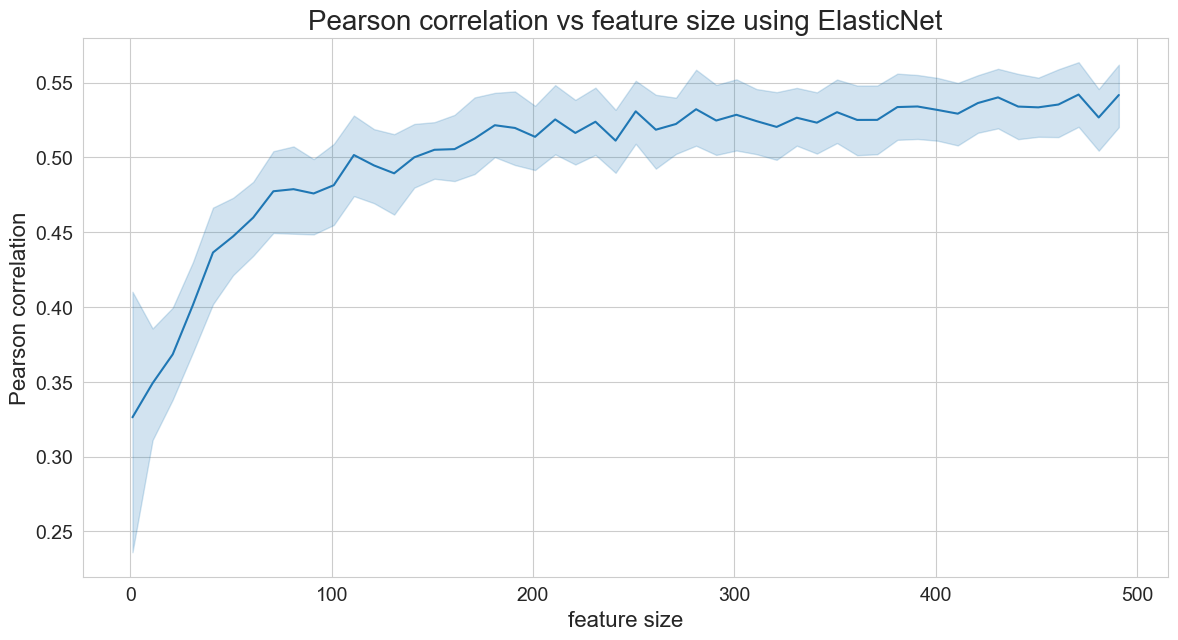

In [32]:
### plot the results

import seaborn as sns

# plot a line plot with error bars for pearson correlation

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='feature_size', y='pearson_corr', data=df, ax=ax)
ax.set_title('Pearson correlation vs feature size using ElasticNet')
ax.set_xlabel('feature size')
ax.set_ylabel('Pearson correlation')
# enlarge the tick labels
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# enlarge the xlabel and ylabel
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
# enlarge the title
ax.title.set_fontsize(20)
plt.show()


In [29]:
feature_size_tested = []
for i in range(1, feature_data.shape[1] + 1, 500):
    feature_size_tested.append(i)
n_iterations = 50
cv_split_size = 0.1
rng_seed_list = []
for i in range(n_iterations):
    rng_seed_list.append(np.random.randint(0, 1000000))

data_collector = []
for f_size in feature_size_tested:
    print(f'feature size: {f_size}')
    for rng in rng_seed_list:
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=cv_split_size, random_state=rng)
        # feature selection
        random_features = np.random.choice(X_train.columns, f_size, replace=False)
        X_train = X_train[random_features]
        X_test = X_test[random_features]
        # train the model
        model = ElasticNet()
        model.fit(X_train, y_train)
        # predict the test set
        y_pred = model.predict(X_test)
        # calculate the mean squared error
        mse = mean_squared_error(y_test, y_pred)
        # calculate the r2 score
        r2 = r2_score(y_test, y_pred)
        # calculate the pearson correlation
        pearson_corr, _ = pearsonr(y_test, y_pred)
        # save the data
        data_collector.append([f_size, rng, mse, r2, pearson_corr])

df = pd.DataFrame(data_collector, columns=['feature_size', 'rng_seed', 'mse', 'r2', 'pearson_corr'])

feature size: 1


An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not d

feature size: 501
feature size: 1001
feature size: 1501
feature size: 2001
feature size: 2501
feature size: 3001
feature size: 3501
feature size: 4001
feature size: 4501
feature size: 5001
feature size: 5501
feature size: 6001
feature size: 6501


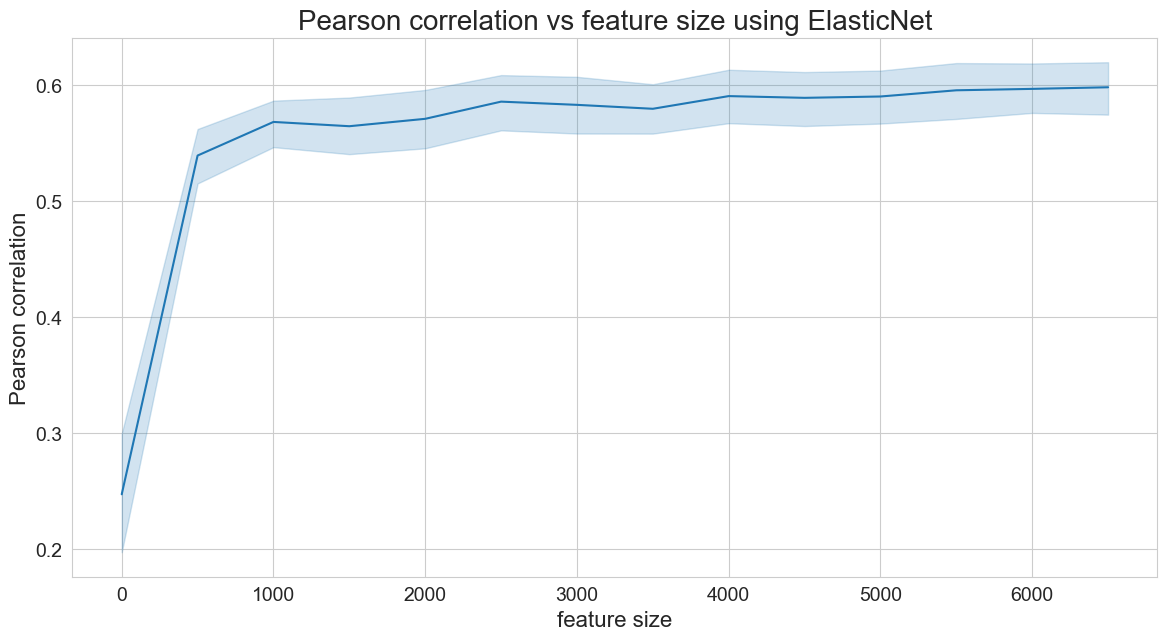

In [30]:
### plot the results

import seaborn as sns

# plot a line plot with error bars for pearson correlation

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='feature_size', y='pearson_corr', data=df, ax=ax)
ax.set_title('Pearson correlation vs feature size using ElasticNet')
ax.set_xlabel('feature size')
ax.set_ylabel('Pearson correlation')
# enlarge the tick labels
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# enlarge the xlabel and ylabel
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
# enlarge the title
ax.title.set_fontsize(20)
plt.show()


### Validation Framework Implementation

#### Initial Parameters

In [61]:
import Visualisation as vis
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# import random forest regression model
from sklearn.ensemble import RandomForestRegressor

# import support vector machine regression model
from sklearn.svm import SVR

# import elastic net regression model
from sklearn.linear_model import ElasticNet

# import simple mlp regression model
from sklearn.neural_network import MLPRegressor

# import xgb regression model
from xgboost import XGBRegressor

# import k nearest neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

## feature selection
# import feature selection
from sklearn.feature_selection import SelectKBest, f_regression
import shap 

## validation
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

## saving and loading files
import pickle


## INPUTS 
# file names 
folder_path = 'data/processed-results/workbook-jun-2023/'
input_parameter_file_path = folder_path + 'input_parameters_test.pkl'
output_file_path = folder_path + 'results_test.pkl'
experiment_name = 'test'
save_input = True
save_output = True

# hyperparameters
max_gene_target_disance = 2 # specify the level of biological relevance to drug target(s)
statistical_filter_size = 100 # can be optimized using global feature dropout testing
monte_carlo_cross_validation_size = 50 # can be automatically optimized via rank impact assessment
models_used = ['ElasticNet']
models_hyperparameters = [{}]

# extra hyperparameters
statistical_filter_threshold = 0.05 # currently not in use
cv_split_size = 0.1

# generated hyperparameters
rng_seed_lists = []
for j in range(monte_carlo_cross_validation_size):
    rng_seed_lists.append(np.random.randint(100000))

def get_model_from_string(model_name, **kwargs):
    if model_name == 'ElasticNet':
        return ElasticNet(**kwargs)
    elif model_name == 'RandomForestRegressor':
        return RandomForestRegressor(**kwargs)
    elif model_name == 'SVR':
        return SVR(**kwargs)
    elif model_name == 'MLPRegressor':
        return MLPRegressor(**kwargs)
    elif model_name == 'XGBRegressor':
        return XGBRegressor(**kwargs)
    elif model_name == 'KNeighborsRegressor':
        return KNeighborsRegressor(**kwargs)
    else:
        raise ValueError(f'{model_name} is not supported')
    
nth_degree_neighbours = [drug_targets, first_degree_neighbours, second_degree_neighbours, third_degree_neighbours]

if save_input:
    # save initial parameters as pickle 
    with open(input_parameter_file_path, 'wb') as f:
        # dump each variable individually
        pickle.dump(max_gene_target_disance, f)
        pickle.dump(statistical_filter_size, f)
        pickle.dump(monte_carlo_cross_validation_size, f)
        pickle.dump(models_used, f)
        pickle.dump(models_hyperparameters, f)
        pickle.dump(statistical_filter_threshold, f)
        pickle.dump(cv_split_size, f)
        pickle.dump(input_parameter_file_path, f)
        pickle.dump(output_file_path, f)
        pickle.dump(rng_seed_lists, f)
        pickle.dump(nth_degree_neighbours, f)
        pickle.dump(experiment_name, f)

In [62]:
network_features = nth_degree_neighbours[max_gene_target_disance]
X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=cv_split_size,
                                                    random_state=rng_seed_lists[0])

if statistical_filter_size > len(network_features):
    statistical_filter_size = len(network_features)
    print(f'WARNING: statistical_filter_size is too large, set to {statistical_filter_size}')

# perform feature selection on the training set
selector = SelectKBest(f_regression, k=statistical_filter_size)
selector.fit(X_train[network_features], y_train)

# get the selected features
selected_features = X_train[network_features].columns[selector.get_support()]

# get the feature importance
feature_importance = selector.scores_[selector.get_support()]

# DEBUG print the selected features and their importance
# print(f'selected features: {selected_features}')
# print(f'feature importance: {feature_importance}')

In [63]:
X_train.shape

(663, 6692)

#### Feature Selection and Consensus Feature Contribution

In [64]:
def get_shap_values(model_str, train_data, test_data):
    if model_str == 'RandomForestRegressor':
        explainer = shap.TreeExplainer(model, train_data)
    elif model_str == 'ElasticNet':
        explainer = shap.LinearExplainer(model, train_data)
    elif model_str == 'XGBRegressor':
        explainer = shap.TreeExplainer(model, train_data)
    elif model_str == 'MLPRegressor':
        explainer = shap.DeepExplainer(model, train_data)
    else:
        explainer = shap.KernelExplainer(model.predict, train_data)
    shap_values = explainer.shap_values(test_data)
    return shap_values

def get_network_stat_features(X_train, y_train, X_test, nth_degree_neighbours, max_gene_target_disance, statistical_filter_size):
    network_features = nth_degree_neighbours[max_gene_target_disance]
    # perform feature selection on the training set
    selector = SelectKBest(f_regression, k=statistical_filter_size)
    selector.fit(X_train[network_features], y_train)
    # get the selected features
    selected_features = X_train[network_features].columns[selector.get_support()]
    sel_train, sel_test = X_train[selected_features], X_test[selected_features]
    return selected_features, sel_train, sel_test

def get_random_features(X_train, y_train, X_test):
    random_features = np.random.choice(X_train.columns, statistical_filter_size, replace=False)
    sel_train, sel_test = X_train[random_features], X_test[random_features]
    return random_features, sel_train, sel_test

def get_all_features(X_train, y_train, X_test):
    sel_train, sel_test = X_train, X_test
    return None, sel_train, sel_test

def get_preset_features(X_train, y_train, X_test, preset_features):
    sel_train, sel_test = X_train[preset_features], X_test[preset_features]
    return preset_features, sel_train, sel_test

verbose = True
max_feature_save_size = 1000
data_collector = []
conditions_to_test = ['network_f_regression_selection', 'whole_dataset_control', 'random_control']
conditions_to_get_feature_importance = [True, False, False]
matched_functions = [get_network_stat_features, get_all_features, get_random_features]
extra_args = [(nth_degree_neighbours, max_gene_target_disance, statistical_filter_size), (), ()]
features_to_knockout = []

for model_str in models_used:
    for rng in rng_seed_lists:
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=cv_split_size,
                                                            random_state=rng)

        for j, condition in enumerate(conditions_to_test):
            if verbose:
                print(f'running {model_str} with seed {rng} under {condition} conditions')
            selected_features, sel_train, sel_test = matched_functions[j](X_train, y_train, X_test, *extra_args[j])
            model = get_model_from_string(model_str, **models_hyperparameters[models_used.index(model_str)])
            model.fit(sel_train, y_train)
            y_pred = model.predict(sel_test)
            score = mean_squared_error(y_test, y_pred)
            corr, p_val = pearsonr(y_test, y_pred)
            r_squared = r2_score(y_test, y_pred)

            shap_values = None        
            if conditions_to_get_feature_importance[j]:
                shap_values = get_shap_values(model_str, sel_train, sel_test)

            if verbose:
                print(f'--- result: prediction correlation {corr}, p-value {p_val}, r-squared {r_squared}')

            # if sel_train and sel_test are too big, they will not be saved
            if sel_train.shape[1] > max_feature_save_size:
                sel_train = None
            if sel_test.shape[1] > max_feature_save_size:
                sel_test = None

            data_collector.append([rng, model_str, condition, selected_features, 
                                   score, corr, p_val, r_squared, shap_values, 
                                   sel_train, sel_test, y_test, y_pred])
            
if verbose:
    print('### All models ran')

df = pd.DataFrame(data_collector, columns=['rng', 'model', 'exp_condition', 'selected_features',
                                           'mse', 'corr', 'p_val', 'r_squared', 'shap_values', 
                                           'X_train', 'X_test', 'y_test', 'y_pred'])

if save_output:
    with open(output_file_path, 'wb') as f:
        pickle.dump(df, f)

if verbose:
    print('### Results saved')

running ElasticNet with seed 97781 under network_f_regression_selection conditions
--- result: prediction correlation 0.5921667782543443, p-value 2.7416255152242758e-08, r-squared 0.30697356007184784
running ElasticNet with seed 97781 under whole_dataset_control conditions
--- result: prediction correlation 0.670795132178805, p-value 6.198536051501028e-11, r-squared 0.3860289647171563
running ElasticNet with seed 97781 under random_control conditions


--- result: prediction correlation 0.6446428537673751, p-value 5.715607705131884e-10, r-squared 0.2782387497738419
running ElasticNet with seed 1833 under network_f_regression_selection conditions
--- result: prediction correlation 0.4170155170221055, p-value 0.00021891494607139355, r-squared 0.16768153885936166
running ElasticNet with seed 1833 under whole_dataset_control conditions
--- result: prediction correlation 0.5312757160101034, p-value 1.1157088884917103e-06, r-squared 0.26407727414622584
running ElasticNet with seed 1833 under random_control conditions
--- result: prediction correlation 0.4359596420323566, p-value 0.00010336971177238805, r-squared 0.13710648026045524
running ElasticNet with seed 43307 under network_f_regression_selection conditions
--- result: prediction correlation 0.44063135723149327, p-value 8.531649881334185e-05, r-squared 0.19398634743673793
running ElasticNet with seed 43307 under whole_dataset_control conditions
--- result: prediction correlation 0.45

In [65]:
df.head()


,rng,model,exp_condition,selected_features,mse,corr,p_val,r_squared,shap_values,X_train,X_test,y_test,y_pred
0,97781,ElasticNet,network_f_regression_selection,"Index(['P35052;GPC1_HUMAN', 'P50990;TCPQ_HUMAN...",2.060781,0.592167,2.741626e-08,0.306974,"[[0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",P35052;GPC1_HUMAN P50990;TCPQ_HUMA...,P35052;GPC1_HUMAN P50990;TCPQ_HUMA...,SIDM00227 3.130052 SIDM01127 5.998958 SI...,"[4.074984745695295, 4.284302024329281, 2.76204..."
1,97781,ElasticNet,whole_dataset_control,None,1.825702,0.670795,6.198536e-11,0.386029,None,None,None,SIDM00227 3.130052 SIDM01127 5.998958 SI...,"[4.156838799173718, 4.515523975488983, 2.39800..."
2,97781,ElasticNet,random_control,"[P27816;MAP4_HUMAN, Q8IXT5;RB12B_HUMAN, P47813...",2.146226,0.644643,5.715608e-10,0.278239,None,P27816;MAP4_HUMAN Q8IXT5;RB12B_HUM...,P27816;MAP4_HUMAN Q8IXT5;RB12B_HUM...,SIDM00227 3.130052 SIDM01127 5.998958 SI...,"[3.423192647006336, 4.052083338661286, 2.95299..."
3,1833,ElasticNet,network_f_regression_selection,"Index(['P50990;TCPQ_HUMAN', 'P40227;TCPZ_HUMAN...",2.231056,0.417016,2.189149e-04,0.167682,"[[-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0...",P50990;TCPQ_HUMAN P40227;TCPZ_HUMA...,P50990;TCPQ_HUMAN P40227;TCPZ_HUMA...,SIDM00251 5.363684 SIDM00045 0.057768 SI...,"[3.898288751849957, 3.8180133765467037, 3.7253..."
4,1833,ElasticNet,whole_dataset_control,None,1.972664,0.531276,1.115709e-06,0.264077,None,None,None,SIDM00251 5.363684 SIDM00045 0.057768 SI...,"[3.4280420859461787, 3.4436389598673234, 4.186..."


### Computing mean contribution
### Plotting mean contribution


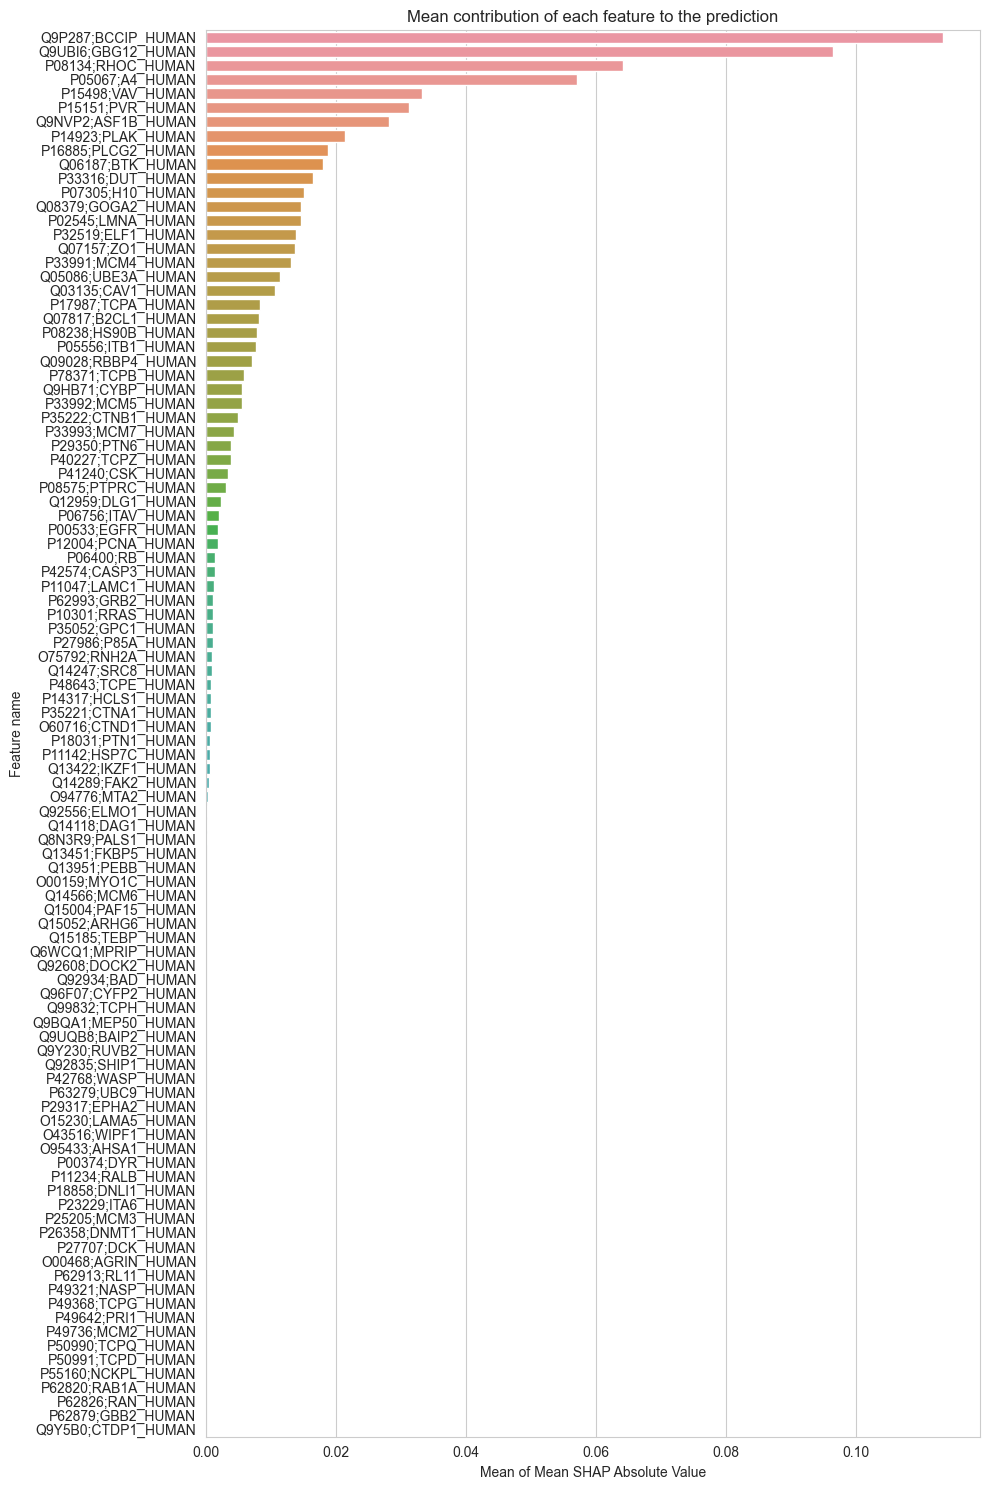

In [66]:
def get_mean_contribution(df, condition='network_f_regression_selection'):
    # df: dataframe with shap_values, X_train and X_test column
    # extract all the shap values, match the feature names and store them in a dataframe

    # for the df, select only the row with the exp_condition column == 'experimental'
    df = df[df['exp_condition'] == condition]

    collector = []
    for shap, x_test in zip(df['shap_values'], df['X_test']):
        # print(shap.shape, cols.shape)
        mean_shap = np.abs(shap).mean(axis=0)
        column_names = x_test.columns
        joint_data = list(zip(column_names, mean_shap))
        # sort the joint data by column names
        joint_data.sort(key=lambda x: x[0])
        collector.append(joint_data)

    # first, create a list of column names

    column_names = [x[0] for x in collector[0]]

    shap_df = pd.DataFrame(collector, columns=column_names)

    # for every cell in the dataframe, keep only the shap value, which is the second element in the tuple

    for col in shap_df.columns:
        shap_df[col] = shap_df[col].apply(lambda x: x[1])

    # sort the dataframe columns by the mean shap values

    shap_df = shap_df.reindex(shap_df.mean().sort_values(ascending=False).index, axis=1)
    shap_df.head()


    # compute the mean shap values for each column

    mean_shap_values = shap_df.mean()
    return mean_shap_values

print('### Computing mean contribution')
mean_shap_values = get_mean_contribution(df)

# plot the mean shap values

import matplotlib.pyplot as plt
import seaborn as sns

print('### Plotting mean contribution')
plt.figure(figsize=(10, 15))
sns.barplot(x=mean_shap_values.values, y=mean_shap_values.index)
plt.title('Mean contribution of each feature to the prediction')
plt.xlabel('Mean of Mean SHAP Absolute Value')
plt.ylabel('Feature name')
plt.tight_layout()
# plt.savefig('mean_contribution.png', dpi=300)



plt.show()

#### in silico Knockout Validation 

are the features really important? Knock them out and check if the model performance decreases, compare it with a random feature knockout. If not, then what new features are contributing to the model performance?

In [67]:
# get the feature with the highest mean shap value

highest_mean_shap = mean_shap_values.index[0]

# get all of the consensus features

consensus_features = [x for x in mean_shap_values.index]

# remove the highest mean shap value from the consensus features

consensus_features.remove(highest_mean_shap)

# print the size of the consensus features

print(f'Consensus features size: {len(consensus_features)}')

knockout_features = consensus_features[:]

Consensus features size: 99


In [68]:
verbose = True
max_feature_save_size = 1000
data_collector = []
conditions_to_test = ['knockout-1']
conditions_to_get_feature_importance = [True]
matched_functions = [get_preset_features]
extra_args = [([knockout_features])]
features_to_knockout = []

for model_str in models_used:
    for rng in rng_seed_lists:
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=cv_split_size,
                                                            random_state=rng)

        for j, condition in enumerate(conditions_to_test):
            if verbose:
                print(f'running {model_str} with seed {rng} under {condition} conditions')
            selected_features, sel_train, sel_test = matched_functions[j](X_train, y_train, X_test, *extra_args[j])
            model = get_model_from_string(model_str, **models_hyperparameters[models_used.index(model_str)])
            model.fit(sel_train, y_train)
            y_pred = model.predict(sel_test)
            score = mean_squared_error(y_test, y_pred)
            corr, p_val = pearsonr(y_test, y_pred)
            r_squared = r2_score(y_test, y_pred)

            shap_values = None        
            if conditions_to_get_feature_importance[j]:
                shap_values = get_shap_values(model_str, sel_train, sel_test)

            if verbose:
                print(f'--- result: prediction correlation {corr}, p-value {p_val}, r-squared {r_squared}')

            # if sel_train and sel_test are too big, they will not be saved
            if sel_train.shape[1] > max_feature_save_size:
                sel_train = None
            if sel_test.shape[1] > max_feature_save_size:
                sel_test = None

            data_collector.append([rng, model_str, condition, selected_features, 
                                   score, corr, p_val, r_squared, shap_values, 
                                   sel_train, sel_test, y_test, y_pred])
            
if verbose:
    print('### All models ran')

new_df = pd.DataFrame(data_collector, columns=['rng', 'model', 'exp_condition', 'selected_features',
                                           'mse', 'corr', 'p_val', 'r_squared', 'shap_values', 
                                           'X_train', 'X_test', 'y_test', 'y_pred'])

running ElasticNet with seed 97781 under knockout-1 conditions
--- result: prediction correlation 0.592177952762479, p-value 2.7395664863280407e-08, r-squared 0.3069815494920771
running ElasticNet with seed 1833 under knockout-1 conditions
--- result: prediction correlation 0.41702332048076074, p-value 0.00021884926628951818, r-squared 0.16768517457100118
running ElasticNet with seed 43307 under knockout-1 conditions
--- result: prediction correlation 0.44063372789960303, p-value 8.530812865331373e-05, r-squared 0.1939883784494919
running ElasticNet with seed 43219 under knockout-1 conditions
--- result: prediction correlation 0.5579034765788572, p-value 2.416160075755967e-07, r-squared 0.3000258096498065
running ElasticNet with seed 4936 under knockout-1 conditions
--- result: prediction correlation 0.33923143532574634, p-value 0.0031094256583351744, r-squared 0.10104733354138906
running ElasticNet with seed 18351 under knockout-1 conditions
--- result: prediction correlation 0.567969

In [69]:
knockout_mean_shap_values = get_mean_contribution(new_df, condition='knockout-1')

### Plotting mean contribution


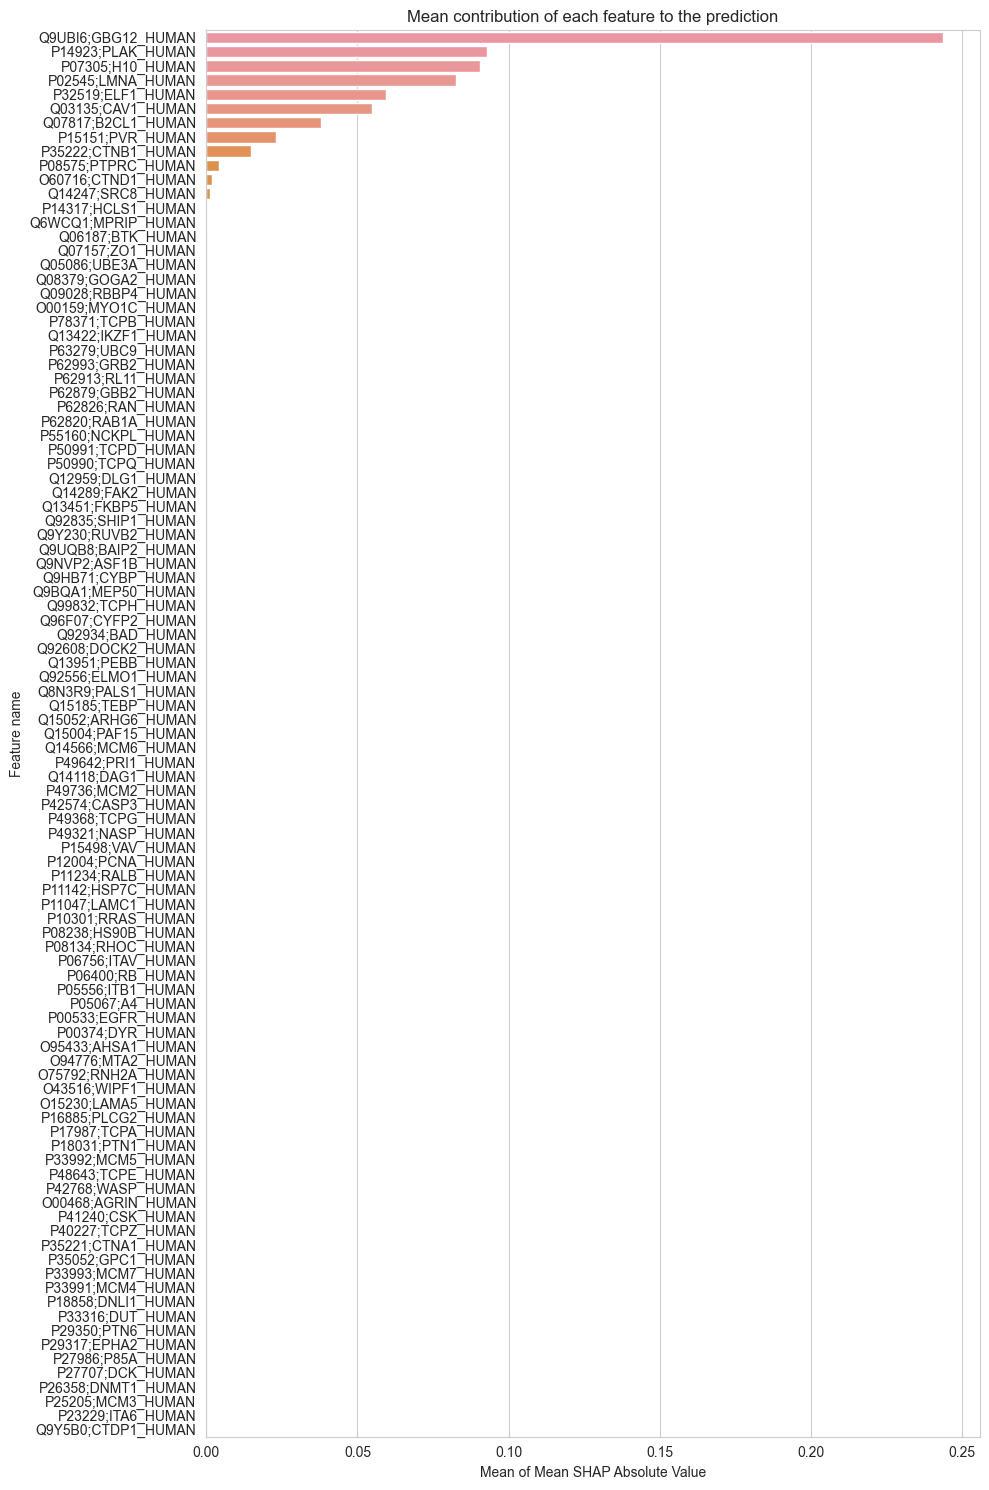

In [70]:
# plot the mean shap values

import matplotlib.pyplot as plt
import seaborn as sns

print('### Plotting mean contribution')
plt.figure(figsize=(10, 15))
sns.barplot(x=knockout_mean_shap_values.values, y=knockout_mean_shap_values.index)
plt.title('Mean contribution of each feature to the prediction')
plt.xlabel('Mean of Mean SHAP Absolute Value')
plt.ylabel('Feature name')
plt.tight_layout()
# plt.savefig('mean_contribution.png', dpi=300)



plt.show()

#### Calculate the difference in mean contribution of features between two mean shap values

### Plotting mean contribution


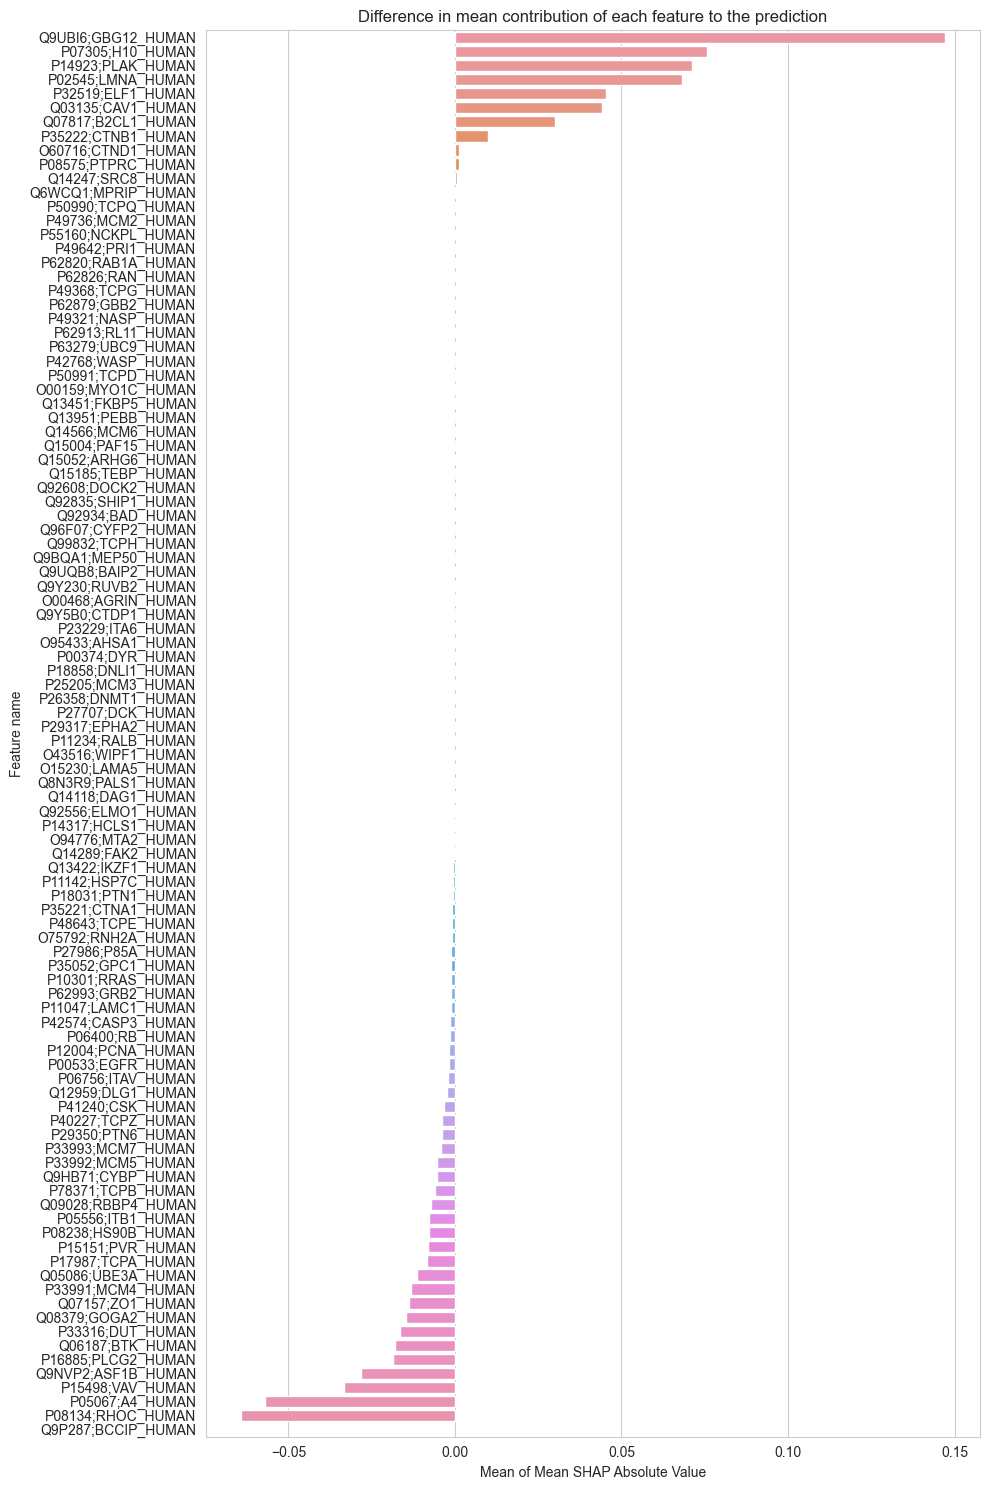

In [71]:
mean_shap_values_1 = mean_shap_values
mean_shap_values_2 = knockout_mean_shap_values

# compute the difference in mean shap values for each feature

mean_shap_values_diff = mean_shap_values_2 - mean_shap_values_1

# sort it by largest difference

mean_shap_values_diff = mean_shap_values_diff.sort_values(ascending=False)

# plot the difference in mean shap values

import matplotlib.pyplot as plt
import seaborn as sns

print('### Plotting mean contribution')
plt.figure(figsize=(10, 15))
sns.barplot(x=mean_shap_values_diff.values, y=mean_shap_values_diff.index)
plt.title('Difference in mean contribution of each feature to the prediction')
plt.xlabel('Mean of Mean SHAP Absolute Value')
plt.ylabel('Feature name')
plt.tight_layout()
# plt.savefig('mean_contribution.png', dpi=300)


In [72]:
# compute the total absolute change in mean shap values by summing the absolute change for each feature

total_abs_change = mean_shap_values_diff.abs().sum()
print(f'### Total absolute change in mean shap values: {total_abs_change}')

# report the mean and variance of the model pearson correlation for both df and new_df

df_exp = df[df['exp_condition'] == 'network_f_regression_selection']
mean_corr_orig, var_corr_orig = df_exp['corr'].mean(), df_exp['corr'].var()
print(f'### Mean correlation of original: {mean_corr_orig}, variance: {var_corr_orig}')

mean_corr, var_corr = new_df['corr'].mean(), new_df['corr'].var()
print(f'### Mean correlation of knockout: {mean_corr}, variance: {var_corr}')

# assess the statistical significance of the difference in mean correlation

from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(df_exp['corr'], new_df['corr'])

print(f'### t-statistic: {t_stat}, p-value: {p_val}')


### Total absolute change in mean shap values: 0.8768009621197232
### Mean correlation of original: 0.551415607915247, variance: 0.0071102520950323015
### Mean correlation of knockout: 0.5515301192956, variance: 0.007145944664891854
### t-statistic: -1.031857837263326, p-value: 0.3072050206344104
